In [136]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [137]:
# Load csv file
comments_data = pd.read_csv('data/labelled_dataset.csv')

# Dataframe
df_comments = pd.DataFrame(comments_data) 

In [138]:
# Dataframes for different platforms
df_fb = df_comments[df_comments['Platform'] == 'Facebook']
df_yt = df_comments[df_comments['Platform'] == 'Youtube']
df_red = df_comments[df_comments['Platform'] == 'Reddit']
df_tik = df_comments[df_comments['Platform'] == 'Tiktok']

## Understanding the dataset

In [139]:
# check data samples 
df_comments.head(3)

,Platform,Text,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Best Topic
0,Facebook,nowadays every thing seem increasing governanc...,0.953512,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,Facebook,disagree high,0.055609,0.055623,0.055557,0.722094,0.055557,0.055561,4
2,Facebook,wag tayong magalala naniniwala isusuprise sir ...,0.000000,0.000000,0.000000,0.010050,0.000000,0.950684,6


In [140]:
# check duplicates
print("Duplicates: ", df_comments.duplicated().sum())

Duplicates:  97


In [141]:
# check missing values
df_comments.isnull().sum()

Platform      0
Text          0
Topic 1       0
Topic 2       0
Topic 3       0
Topic 4       0
Topic 5       0
Topic 6       0
Best Topic    0
dtype: int64

In [142]:
# check the data type of each column
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5156 entries, 0 to 5155
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Platform    5156 non-null   object 
 1   Text        5156 non-null   object 
 2   Topic 1     5156 non-null   float64
 3   Topic 2     5156 non-null   float64
 4   Topic 3     5156 non-null   float64
 5   Topic 4     5156 non-null   float64
 6   Topic 5     5156 non-null   float64
 7   Topic 6     5156 non-null   float64
 8   Best Topic  5156 non-null   int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 362.7+ KB


In [143]:
# describe the dataset
df_comments.describe()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Best Topic
count,5156.000000,5156.000000,5156.000000,5156.000000,5156.000000,5156.000000,5156.000000
mean,0.253723,0.128385,0.224907,0.153131,0.083543,0.152608,3.074670
std,0.291060,0.199068,0.275752,0.225898,0.151803,0.233541,1.758904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.027814,0.018573,0.023843,0.016793,0.015169,0.016706,1.000000
50%,0.083335,0.041674,0.058772,0.041723,0.027883,0.041676,3.000000
75%,0.475188,0.127986,0.382984,0.187262,0.055839,0.173125,4.000000
max,0.997189,0.984736,0.983513,0.950766,0.965216,0.968768,6.000000


In [144]:
# check unique platforms
df_comments['Platform'].unique()

array(['Facebook', 'Reddit', 'Tiktok', 'Youtube'], dtype=object)

## Visualization

In [166]:
# Generate bar graph
from collections import Counter
import seaborn as sns

def draw_bar_graph_for_text_visualization(df, platform):
    best_topic = Counter(df['Best Topic'])
    df_best_topic = pd.DataFrame(best_topic.most_common(6), columns=['Topic', 'Count'])
    
    # add percentage column
    sum_count = df_best_topic['Count'].sum()
    count_percentages = []
    for num in df_best_topic['Count']:
        percent = round((num/sum_count)*100)
        count_percentages.append(percent)
    df_best_topic.insert(2, "Percent (%)", count_percentages, True)

    # show bar plot
    fig, ax = plt.subplots(figsize=(20, 10))
    sns.barplot( x='Count', y='Topic', data=df_best_topic, ax=ax, orient='h')
    plt.title("Number of Best Topics on " + platform + "".format(platform))
    plt.xticks(rotation='horizontal');
    for i in ax.containers:
        ax.bar_label(i,)
    
    # show bar plot percentage
    fig, ax = plt.subplots(figsize=(20, 10))
    sns.barplot( x='Percent (%)', y='Topic', data=df_best_topic, ax=ax, orient='h')
    plt.title("Percentages of Best Topics on " + platform + "".format(platform))
    plt.xticks(rotation='horizontal');
    for i in ax.containers:
        ax.bar_label(i,)

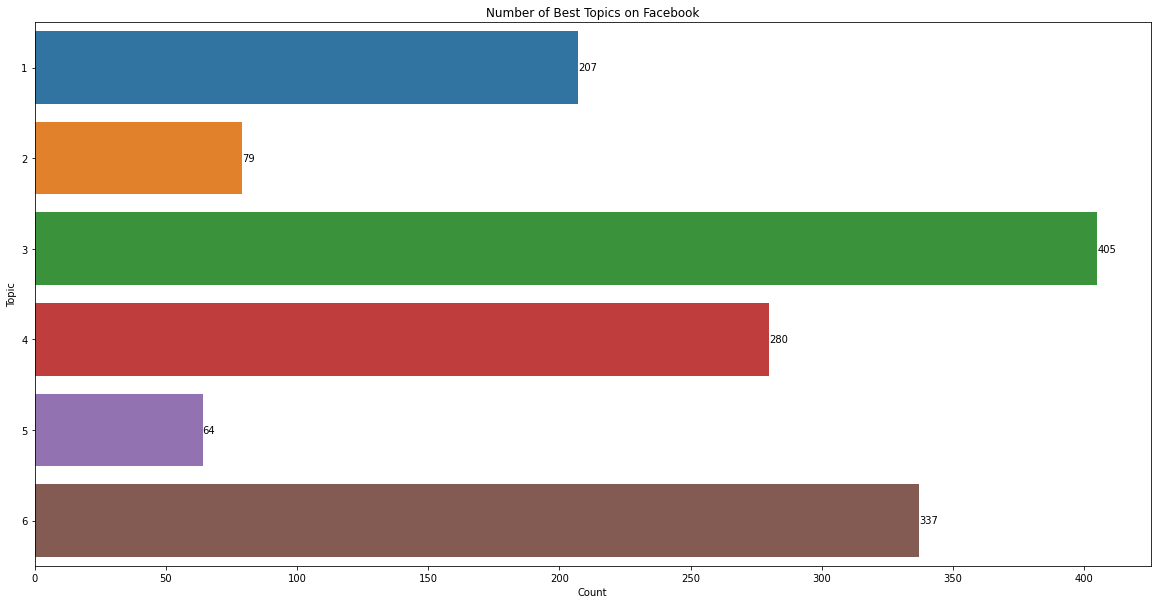

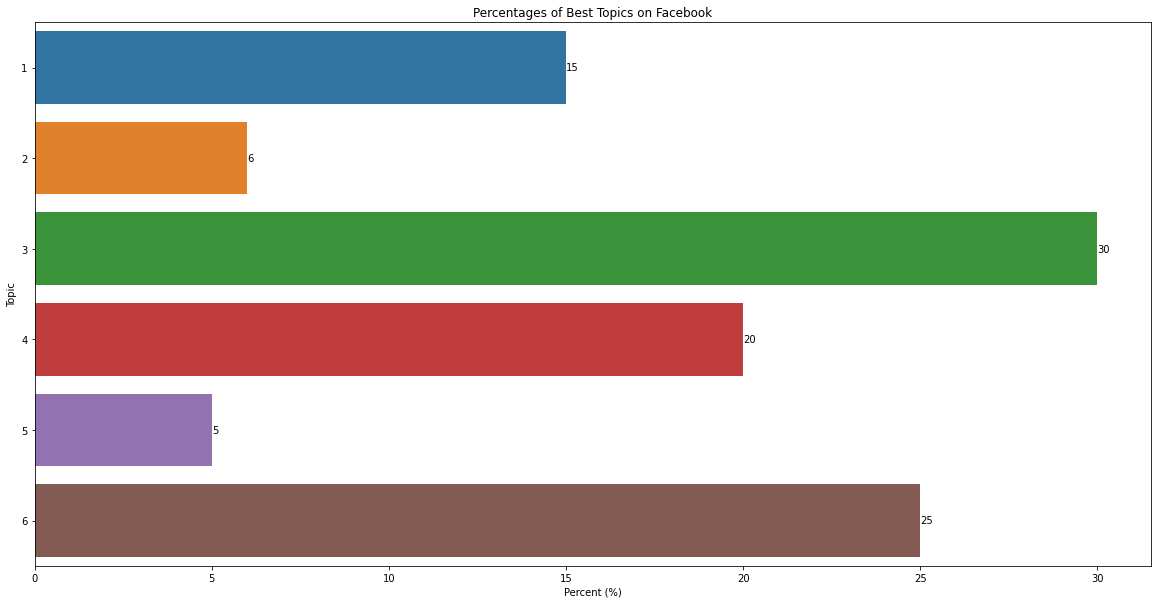

In [167]:
# Number and Percentage of Best Topics on Facebook
draw_bar_graph_for_text_visualization(df_fb, 'Facebook')

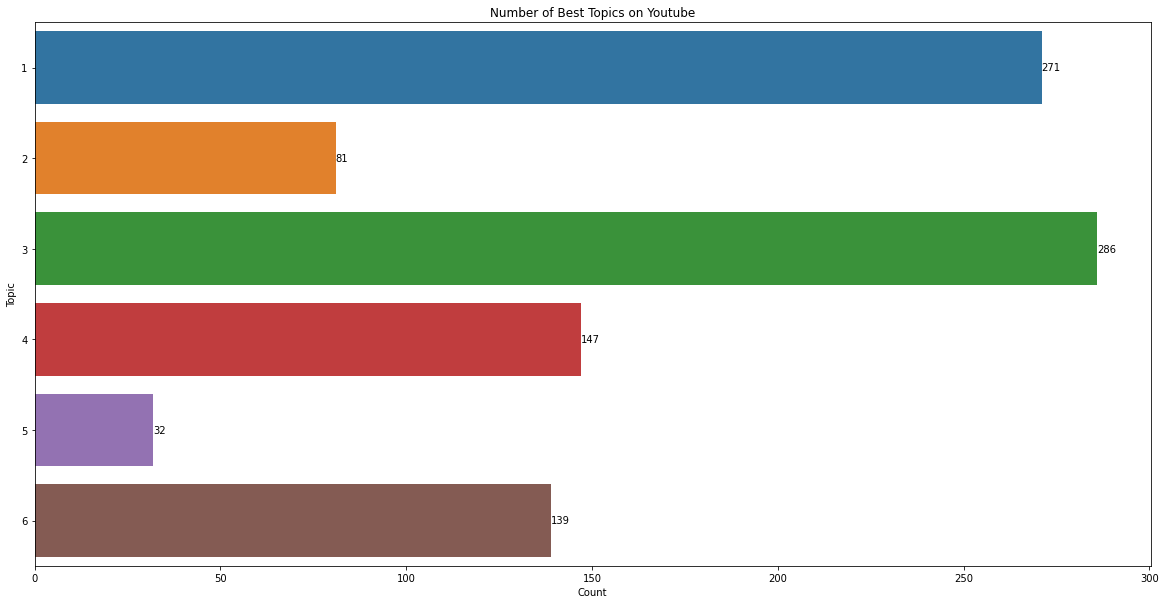

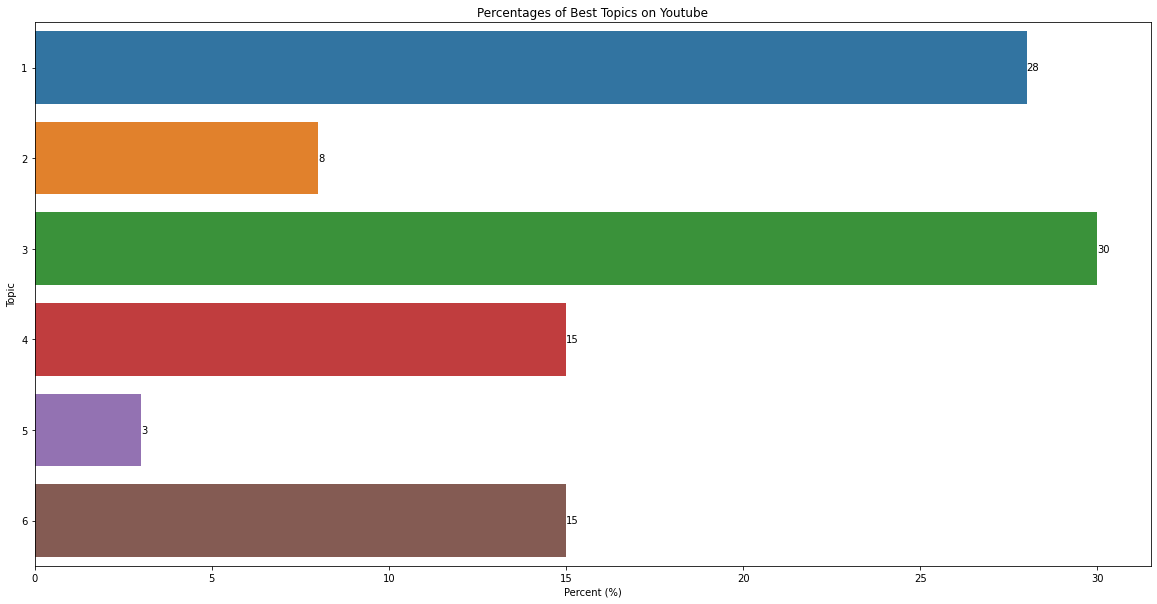

In [168]:
# Number and Percentage of Best Topics on Youtube
draw_bar_graph_for_text_visualization(df_yt, 'Youtube')

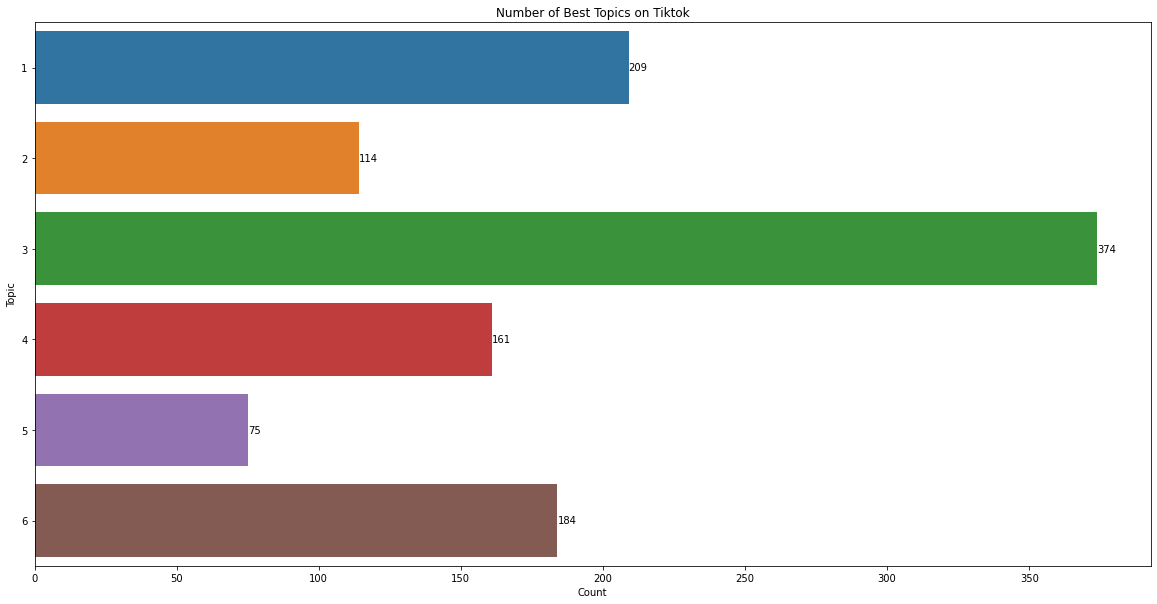

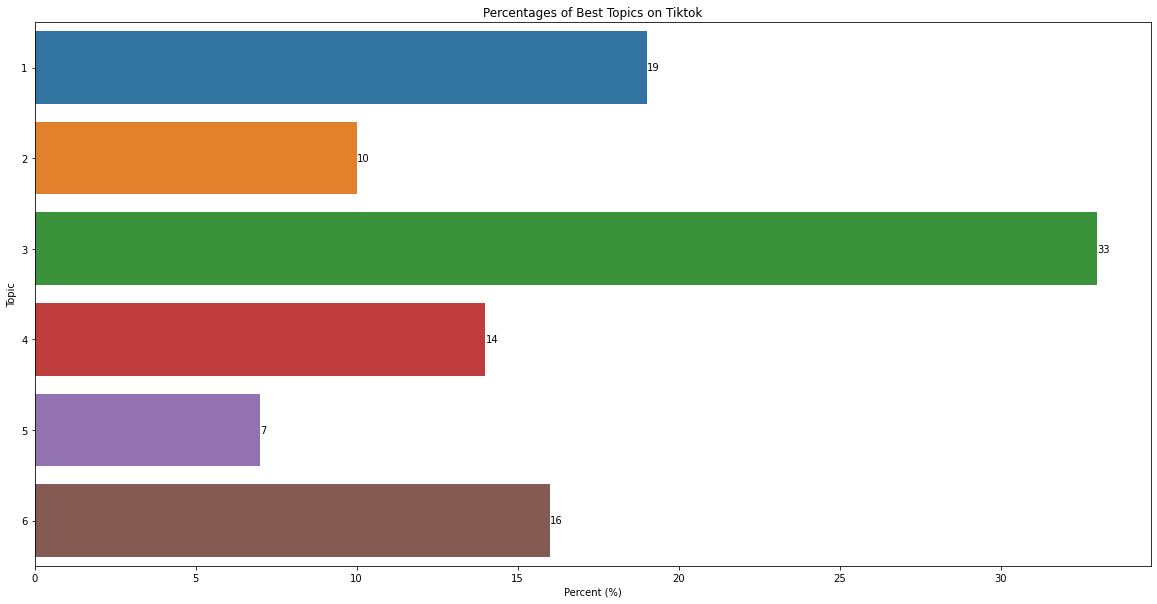

In [169]:
# Number and Percentage of Best Topics on Tiktok
draw_bar_graph_for_text_visualization(df_tik, 'Tiktok')

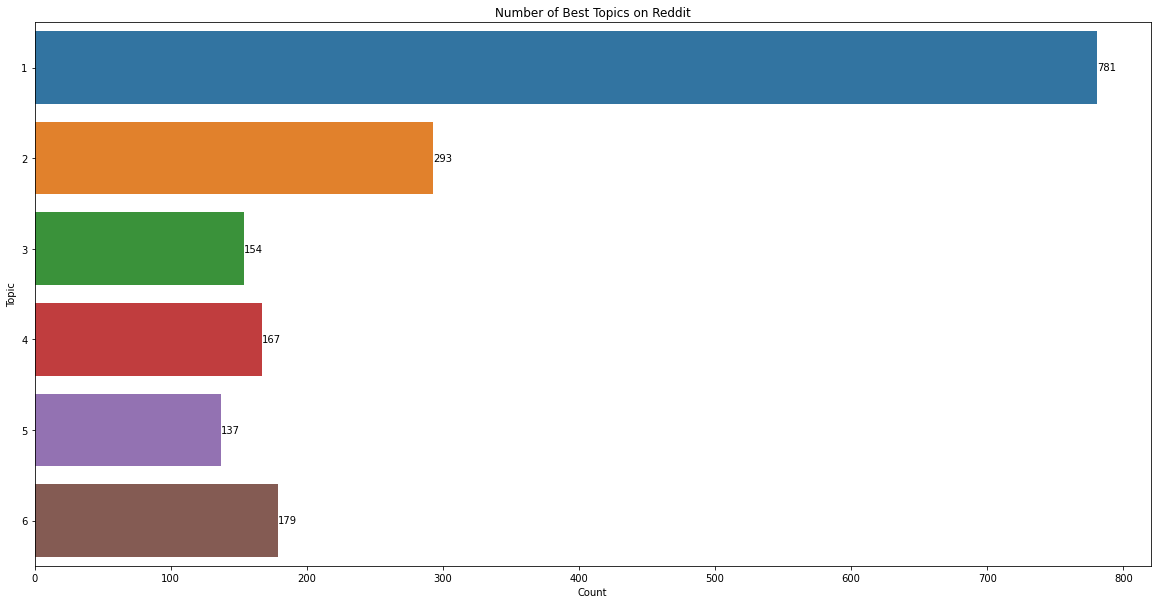

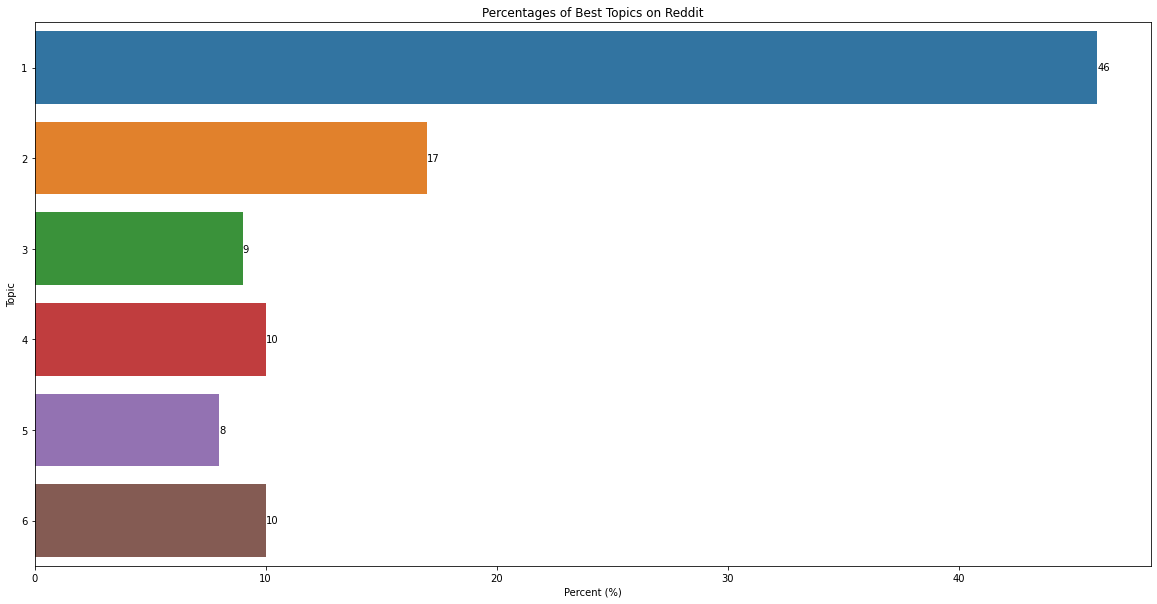

In [170]:
# Number and Percentage of Best Topics on Reddit
draw_bar_graph_for_text_visualization(df_red, 'Reddit')

In [173]:
# import pandas as pd
# from collections import Counter
# from functools import reduce

# def generate_bigram(df):
#     df['bigrams'] = df['Text'].apply(lambda item:Counter([bg for bg in zip(item.split(), item.split()[1:])]))
#     df['trigrams'] = df['Text'].apply(lambda item:Counter([bg for bg in zip(item.split(), item.split()[1:], item.split()[2:])]))
#     total_bigram = reduce(lambda a, b: a+b , df['bigrams'].to_list())
#     total_trigram = reduce(lambda a, b: a+b , df['trigrams'].to_list())
#     print(total_bigram.most_common(10))
    

In [174]:
# generate_bigram(df_fb)

C:\Users\Fujitsu\AppData\Local\Temp/ipykernel_16024/612152835.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bigrams'] = df['Text'].apply(lambda item:Counter([bg for bg in zip(item.split(), item.split()[1:])]))
C:\Users\Fujitsu\AppData\Local\Temp/ipykernel_16024/612152835.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trigrams'] = df['Text'].apply(lambda item:Counter([bg for bg in zip(item.split(), item.split()[1:], item.split()[2:])]))


[(('ibang', 'bansa'), 34), (('buong', 'mundo'), 32), (('ginusto', 'nyo'), 25), (('golden', 'era'), 16), (('party', 'party'), 14), (('presyo', 'bilihin'), 13), (('inflation', 'rate'), 12), (('basta', 'unity'), 11), (('sd', 'card'), 11), (('binoto', 'nyo'), 11)]
